# Aula 04 - Exercício 03
## PCA e Regressão Polinomial Multivariada
### Alunos:
 - Bruno Gomes Coelho       - 9791160
 - Bruno Mendes da Costa - 9779433
 

# PCA
 O conjunto Iris consiste na medida de 4 características de plantas e seus respectivos tipos. Embora não é possível visualizar o conjunto de 4 dimensões, podemos utilizar a técnica PCA para reduzir a dimensionalidade do conjunto para 2 ou 3 dimensões.
- Utilize a técnica PCA para visualizar em duas dimensões o conjunto Iris, já carregado abaixo. 
Lembre-se que os dados devem estar normalizados e centrados na média antes de aplicar o PCA.
  - Dica: Utilize a classe StandardScaler para pré-processar os dados

<Figure size 576x396 with 0 Axes>

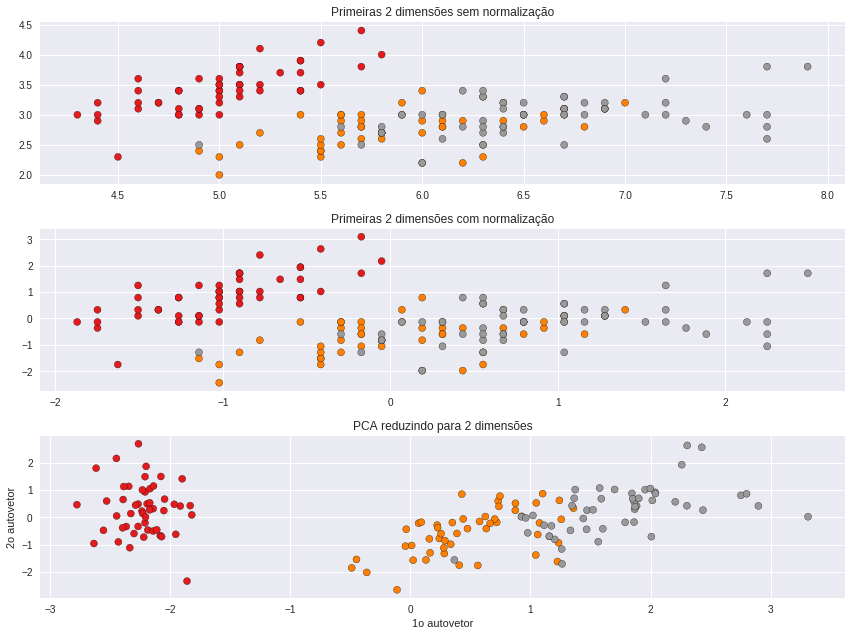

In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

iris = datasets.load_iris()
x = iris.data
y = iris.target

#####
x_std = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_std)


#####
plt.figure()


plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.title('Primeiras 2 dimensões sem normalização')

plt.subplot(3, 1, 2)
plt.scatter(x_std[:, 0], x_std[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.title('Primeiras 2 dimensões com normalização')

plt.subplot(3, 1, 3)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.title('PCA reduzindo para 2 dimensões')
plt.xlabel("1o autovetor")
plt.ylabel("2o autovetor")

plt.tight_layout()




---

- Mostre a variância e a porcentagem da variância que é expressa por cada componente principal.
  - Dica: Utilize as variáveis `explained_variance_`  e `explained_variance_ratio_`  da classe PCA. 

In [2]:
print("Variancia: ", pca.explained_variance_) 
print("% da Variancia: ", pca.explained_variance_ratio_)

print("Total explicado por totdos os componentes:", sum(pca.explained_variance_ratio_))

Variancia:  [2.93808505 0.9201649 ]
% da Variancia:  [0.72962445 0.22850762]
Total explicado por totdos os componentes: 0.9581320720000165




---



Para os próximos exercícios utilizaremos a base de dados 'Boston House Prices'.  Os dados possuem dimensionalidade 10, e são distribuidos em 442 exemplos. O pré-carregamento da base já foi feito abaixo.

- Aplique PCA para reduzir a dimensionalidade para 3. Lembre-se de centralizar e normalizar os dados antes de aplicar o PCA

In [3]:
# Boston
data = datasets.load_boston()

x = data.data
y = data.target

print("Quantidade de colunas originais", x.shape[1])

x_std = StandardScaler().fit_transform(x)

pca_3 = PCA(n_components=3)
x_pca_3 = pca_3.fit_transform(x_std)

print("% da Variancia: ", pca_3.explained_variance_ratio_)
print("Total explicado por totdos os componentes:", sum(pca_3.explained_variance_ratio_))

Quantidade de colunas originais 13
% da Variancia:  [0.47129606 0.11025193 0.0955859 ]
Total explicado por totdos os componentes: 0.6771338939748569




---

- Novamente, aplique o algoritmo de PCA para reduzir o número de variáveis do conjunto original para 4.

In [4]:
pca_4 = PCA(n_components=4)
x_pca_4 = pca_4.fit_transform(x_std)

print("% da Variancia: ", pca_4.explained_variance_ratio_)
print("Total explicado por totdos os componentes:", sum(pca_4.explained_variance_ratio_))

% da Variancia:  [0.47129606 0.11025193 0.0955859  0.06596732]
Total explicado por totdos os componentes: 0.7431012099832185




---

- Faça regressão utilizando uma reta no conjunto com dimensão 3 e calcule seu score R2, MAE, MSE.

In [0]:
def calculate_metrics(target, preds):
    # Função auxiliar para cálculo das métricas
    print(f"R2 score: {r2_score(target, preds)}")
    print(f"MAE score: {mean_absolute_error(target, preds)}")
    print(f"MSE score: {mean_squared_error(target, preds)}")
    print()



In [6]:
lr_3 = LinearRegression(fit_intercept=True)
lr_3.fit(x_pca_3, y)
preds = lr_3.predict(x_pca_3)

calculate_metrics(y, preds)

R2 score: 0.6359238692396255
MAE score: 3.831159055322357
MSE score: 30.735145365844904





---

- Agora faça regressão utilizando uma reta com os dados de dimensionalidade 4 e calcule seu score R2, MAE, MSE.

In [7]:
lr_4 = LinearRegression(fit_intercept=True)
lr_4.fit(x_pca_4, y)
preds = lr_4.predict(x_pca_4)

calculate_metrics(y, preds)

R2 score: 0.6477642937695794
MAE score: 3.7366261962151524
MSE score: 29.735581982325623





---

- Utilizando uma função quadrática, faça regressão utilizando as 3 variáveis mais relevantes e calcule seu score R2, MAE, MSE

In [8]:

poly_3 = PolynomialFeatures(degree=2)
poly_3.fit(x_pca_3)
x_poly_3 = poly_3.transform(x_pca_3)

print(poly_3.get_feature_names())

lr = LinearRegression(fit_intercept=False)
lr.fit(x_poly_3, y)
preds = lr.predict(x_poly_3)

calculate_metrics(y, preds)

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']
R2 score: 0.7035786045963169
MAE score: 3.321097251538901
MSE score: 25.023762635170176





---

- Por fim, faça regressão no conjunto de dimensão 4 utilizando uma função quadrática. Calcule seu score R2, MAE, MSE e compare com os modelos gerados anteriormente.


In [9]:
poly_4 = PolynomialFeatures(degree=2)
poly_4.fit(x_pca_4)
x_poly_4 = poly_4.transform(x_pca_4)

print(poly_4.get_feature_names())

lr = LinearRegression(fit_intercept=False)
lr.fit(x_poly_4, y)
preds = lr.predict(x_poly_4)

calculate_metrics(y, preds)

['1', 'x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']
R2 score: 0.746517685580061
MAE score: 3.0555179557353385
MSE score: 21.398864476768843

